In [26]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [123]:
mu = 100 # Billion
days = 365
def gen_data(mean, std_dev, count):
    return np.abs(np.random.normal(mean, std_dev, count))

In [125]:
rows = np.round(gen_data(mu, 50, days), 0)*1e9
rows[:50]

array([7.60e+10, 8.50e+10, 2.80e+10, 8.50e+10, 1.32e+11, 4.00e+10,
       9.20e+10, 1.09e+11, 1.44e+11, 1.85e+11, 1.40e+11, 1.29e+11,
       1.27e+11, 2.39e+11, 6.30e+10, 1.13e+11, 6.70e+10, 1.19e+11,
       4.40e+10, 9.80e+10, 1.16e+11, 1.20e+11, 1.24e+11, 7.70e+10,
       1.01e+11, 7.70e+10, 1.26e+11, 2.50e+10, 4.70e+10, 1.53e+11,
       1.21e+11, 6.20e+10, 1.30e+11, 7.30e+10, 8.40e+10, 1.33e+11,
       1.40e+11, 1.19e+11, 1.21e+11, 1.59e+11, 1.52e+11, 4.50e+10,
       1.06e+11, 2.60e+10, 1.93e+11, 1.08e+11, 1.49e+11, 8.10e+10,
       6.30e+10, 1.00e+11])

In [126]:
size_kb = gen_data(1, 0.5, days)
size_kb[:50]

array([0.37804086, 1.4310176 , 1.38367145, 0.1703356 , 1.10214864,
       0.94368351, 0.40753137, 1.81722604, 0.74990252, 0.55472986,
       1.02678989, 0.05822738, 0.13952269, 1.05032747, 1.55444293,
       1.11207858, 1.37636545, 1.28390583, 0.7251879 , 0.61229292,
       0.94127586, 1.83400241, 1.72365627, 0.87385829, 1.32833325,
       1.33978541, 1.03023655, 1.41130189, 0.91023485, 0.4766744 ,
       1.12112119, 0.29841335, 0.92189602, 1.29219861, 0.70950422,
       1.41413026, 1.19710099, 0.3520745 , 0.57619519, 0.55969834,
       1.41786442, 2.06128665, 1.73588517, 0.5654301 , 0.96902394,
       0.34608189, 0.40497929, 1.72077847, 1.1033408 , 0.15973878])

In [136]:
df = pd.DataFrame({"rows": rows, "size": size_kb})
df["total_size_gb"] = np.round((df["rows"] * df["size"])/1024/1024)

In [137]:
df["cost"] = df["total_size_gb"] * 0.15214
# df["cost_log"] = np.log(df["cost"])

In [138]:
df

,rows,size,total_size_gb,cost
0,7.600000e+10,0.378041,27400.0,4168.63600
1,8.500000e+10,1.431018,116002.0,17648.54428
2,2.800000e+10,1.383671,36948.0,5621.26872
3,8.500000e+10,0.170336,13808.0,2100.74912
4,1.320000e+11,1.102149,138744.0,21108.51216
...,...,...,...,...
360,1.540000e+11,1.848013,271410.0,41292.31740
361,4.500000e+10,1.219973,52356.0,7965.44184
362,5.900000e+10,1.835964,103304.0,15716.67056
363,7.700000e+10,0.550999,40461.0,6155.73654


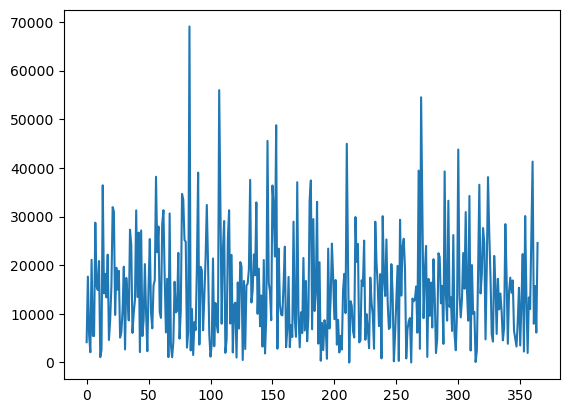

In [139]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(df["cost"])

In [140]:
df

,rows,size,total_size_gb,cost
0,7.600000e+10,0.378041,27400.0,4168.63600
1,8.500000e+10,1.431018,116002.0,17648.54428
2,2.800000e+10,1.383671,36948.0,5621.26872
3,8.500000e+10,0.170336,13808.0,2100.74912
4,1.320000e+11,1.102149,138744.0,21108.51216
...,...,...,...,...
360,1.540000e+11,1.848013,271410.0,41292.31740
361,4.500000e+10,1.219973,52356.0,7965.44184
362,5.900000e+10,1.835964,103304.0,15716.67056
363,7.700000e+10,0.550999,40461.0,6155.73654


In [146]:
# Monte Carlo
estimates = []
years = 10000
for _ in range(years):
    rows = np.round(gen_data(mu, 50, days), 0)*1e9
    size_kb = gen_data(1, 0.5, days)
    df = pd.DataFrame({"rows": rows, "size": size_kb})
    df["total_size_gb"] = np.round((df["rows"] * df["size"])/1024/1024)
    df["cost"] = df["total_size_gb"] * 0.15214
    estimates.append(df["cost"].sum())

(array([1.90095700e-09, 1.33066990e-08, 2.28114840e-08, 4.75239249e-08,
        8.55430649e-08, 1.80590915e-07, 3.83993314e-07, 5.18961260e-07,
        7.54679928e-07, 1.08164453e-06, 1.44282636e-06, 1.60250675e-06,
        1.87624456e-06, 1.96368858e-06, 1.94467901e-06, 1.82872063e-06,
        1.55498282e-06, 1.14817803e-06, 9.56181370e-07, 6.19711981e-07,
        4.16309582e-07, 2.45223453e-07, 1.53977517e-07, 7.98401939e-08,
        4.18210539e-08, 2.47124410e-08, 5.70287099e-09, 7.60382799e-09,
        3.80191400e-09, 1.90095700e-09]),
 array([4658313.19544 , 4710918.278104, 4763523.360768, 4816128.443432,
        4868733.526096, 4921338.60876 , 4973943.691424, 5026548.774088,
        5079153.856752, 5131758.939416, 5184364.02208 , 5236969.104744,
        5289574.187408, 5342179.270072, 5394784.352736, 5447389.4354  ,
        5499994.518064, 5552599.600728, 5605204.683392, 5657809.766056,
        5710414.84872 , 5763019.931384, 5815625.014048, 5868230.096712,
        5920835.179376

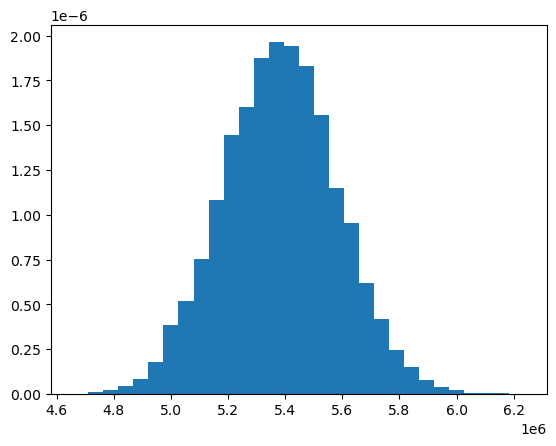

In [147]:
plt.hist(estimates, 30, density=True)